# Plot data overview

Plot meta-information from `participants.tsv` and from participant folders (mostly `channels.tsv`)

From `participants.tsv`:
* age and sex of participants
* handedness
* language dominance
* distribution of fMRI / iEEG and high-density iEEG data across participants
* implanted iEEG hemisphere

From participant folders:
* percent of bad iEEG channels across participants
* number of good iEEG channels across participants
* distribution of ECoG, sEEG and high-density ECoG across participants
* distribution of task rest and natural rest
* sampling rate of iEEG data
* anatomical sessions across participants (3t or 7t)
* distribution of breathing, heart rate and electroocculography data across participants

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import squarify

from matplotlib import pyplot as plt
from ieeg_fmri_validation.meta import read_meta
%matplotlib inline

pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 200)
sns.reset_defaults()
sns.set_context('notebook')

In [2]:
def plot_bad_ratios(hist_data):
    plt.figure(figsize=(3, 3))
    ax = sns.histplot(np.round(np.array(hist_data)),
                      kde=True, edgecolor="w", linewidth=1,
                      bins=range(int(np.max(np.round(np.array(hist_data))) + 2)))
    plt.xlabel('Percent bad electrodes')
    mids = [rect.get_x() + rect.get_width() / 2 for rect in ax.patches]
    plt.xticks(mids, (np.array(mids) - .5).astype(int))
    plt.tight_layout()


def plot_good_electrodes(hist_data):
    plt.figure(figsize=(3, 3))
    ax = sns.histplot(np.round(np.array(hist_data)),
                      kde=True, edgecolor="w", linewidth=1,
                      bins=range(int(np.min(np.round(np.array(hist_data)))), int(np.max(np.round(np.array(hist_data)))+10), 10))
    plt.xlabel('Good electrodes')
    mids = [rect.get_x() + rect.get_width() / 2 for rect in ax.patches]
    plt.xticks(mids)
    plt.tight_layout()


def plot_value_counts(hist_data):
    plt.figure(figsize=(3, 3))
    prop_cycle = plt.rcParams['axes.prop_cycle']
    cmap = prop_cycle.by_key()['color']
    colors = cmap[:len(hist_data.value_counts())]
    squarify.plot(sizes=hist_data.value_counts(),
                  color=colors,
                  label=hist_data.value_counts().index.values,
                  alpha=.2)


def plot_sums(data):
    x = data.sum(axis=0)
    plt.figure(figsize=(3, 3))
    prop_cycle = plt.rcParams['axes.prop_cycle']
    cmap = prop_cycle.by_key()['color']
    colors = cmap[:len(x)]
    squarify.plot(x, color=colors, label=x.index, alpha=.2)

### Specify path to the BIDS dataset

In [3]:
bids_dir='/Fridge/users/julia/project_chill_dataset_paper/data/BIDS2'

### Load `participants.tsv`

In [4]:
table_subjs = pd.read_csv(os.path.join(bids_dir, 'participants.tsv'), sep='\t')
table_subjs['language_dominance']=table_subjs['language_dominance'].str.strip()
print(table_subjs.head(10))

  participant_id sex  age handedness language_dominance language_dominance_technique iEEG fMRI iEEG_hemisphere high_density_grid
0         sub-01   M   55          R                NaN                          NaN  yes   no              LR                no
1         sub-02   F    9          R                  L                  fTCD + fMRI  yes   no               L                no
2         sub-03   F   33          R                  L                         Wada  yes   no               L                no
3         sub-04   M   11          R         possibly L                         fMRI   no  yes             NaN               NaN
4         sub-05   F   33          R                  L                         fTCD  yes   no               L                no
5         sub-06   F   43          R                  L                         fMRI  yes   no               L                no
6         sub-07   F   42          R                  L                         fMRI  yes  yes   

### Load meta-information from participant folders

In [5]:
meta = read_meta(bids_dir)

01
film
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-01/ses-iemu/ieeg/sub-01_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
rest
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-01/ses-iemu/ieeg/sub-01_ses-iemu_task-rest_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
02
film
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-02/ses-iemu/ieeg/sub-02_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
rest


/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-02/ses-iemu/ieeg/sub-02_ses-iemu_task-rest_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
03
film
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-03/ses-iemu/ieeg/sub-03_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
rest
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-03/ses-iemu/ieeg/sub-03_ses-iemu_task-rest_acq-clinical_run-4_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
05
film


/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-05/ses-iemu/ieeg/sub-05_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
rest
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-05/ses-iemu/ieeg/sub-05_ses-iemu_task-rest_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
06
film
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-06/ses-iemu/ieeg/sub-06_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
rest
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-06/ses-iemu/ieeg/sub-06_ses-iemu_t

/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-12/ses-iemu/ieeg/sub-12_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
rest
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-12/ses-iemu/ieeg/sub-12_ses-iemu_task-rest_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
13
film
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-13/ses-iemu/ieeg/sub-13_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
rest
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-13/ses-iemu/ieeg/sub-13_ses-iemu_t

/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-14/ses-iemu/ieeg/sub-14_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
rest
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-14/ses-iemu/ieeg/sub-14_ses-iemu_task-rest_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
16
film


/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-16/ses-iemu/ieeg/sub-16_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
rest
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-16/ses-iemu/ieeg/sub-16_ses-iemu_task-rest_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
17
film


/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-17/ses-iemu/ieeg/sub-17_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
rest
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-17/ses-iemu/ieeg/sub-17_ses-iemu_task-rest_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
18
film


/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-18/ses-iemu/ieeg/sub-18_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
rest
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-18/ses-iemu/ieeg/sub-18_ses-iemu_task-rest_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
19
film


/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-19/ses-iemu/ieeg/sub-19_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
rest
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-19/ses-iemu/ieeg/sub-19_ses-iemu_task-rest_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
20
film
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-20/ses-iemu/ieeg/sub-20_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
rest
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-20/ses-iemu/ieeg/sub-20_ses-iemu_t

/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-21/ses-iemu/ieeg/sub-21_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
rest
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-21/ses-iemu/ieeg/sub-21_ses-iemu_task-rest_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
22
film
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-22/ses-iemu/ieeg/sub-22_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
rest
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-22/ses-iemu/ieeg/sub-22_ses-iemu_t

/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-25/ses-iemu/ieeg/sub-25_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
rest


/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-25/ses-iemu/ieeg/sub-25_ses-iemu_task-rest_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
26
film
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-26/ses-iemu/ieeg/sub-26_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
rest
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-26/ses-iemu/ieeg/sub-26_ses-iemu_task-rest_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
27
film
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-27/ses-iemu/ieeg/sub-27_ses-iem

/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-28/ses-iemu/ieeg/sub-28_ses-iemu_task-rest_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
30
film
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-30/ses-iemu/ieeg/sub-30_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
rest
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-30/ses-iemu/ieeg/sub-30_ses-iemu_task-rest_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
30
film
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-30/ses-iemu/ieeg/sub-30_ses-iem

/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-32/ses-iemu/ieeg/sub-32_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
rest
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-32/ses-iemu/ieeg/sub-32_ses-iemu_task-rest_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
33
film
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-33/ses-iemu/ieeg/sub-33_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
34
film
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-34/ses-iemu/ieeg/sub-34_ses-iem

/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-39/ses-iemu/ieeg/sub-39_ses-iemu_task-rest_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
40
film
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-40/ses-iemu/ieeg/sub-40_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
rest


/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-40/ses-iemu/ieeg/sub-40_ses-iemu_task-rest_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
41
film
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-41/ses-iemu/ieeg/sub-41_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
rest
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-41/ses-iemu/ieeg/sub-41_ses-iemu_task-rest_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
42
film
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-42/ses-iemu/ieeg/sub-42_ses-iem

/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-45/ses-iemu/ieeg/sub-45_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
rest
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-45/ses-iemu/ieeg/sub-45_ses-iemu_task-rest_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
45
film
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-45/ses-iemu/ieeg/sub-45_ses-iemu_task-film_acq-HDgrid_run-2_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
rest
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-45/ses-iemu/ieeg/sub-45_ses-iemu_tas

/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-57/ses-iemu/ieeg/sub-57_ses-iemu_task-film_acq-clinical_run-2_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
rest
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-57/ses-iemu/ieeg/sub-57_ses-iemu_task-rest_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
58
film
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-58/ses-iemu/ieeg/sub-58_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
rest
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-58/ses-iemu/ieeg/sub-58_ses-iemu_t

/home/julia/Documents/project_chill_dataset_paper/git/ieeg-fmri-dataset-validation/ieeg_fmri_validation/iemu/classes.py:72: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  self.raw = mne.io.read_raw_brainvision(self.raw_path,


Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-61/ses-iemu/ieeg/sub-61_ses-iemu_task-film_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
rest
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-61/ses-iemu/ieeg/sub-61_ses-iemu_task-rest_acq-clinical_run-1_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
63
film
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-63/ses-iemu/ieeg/sub-63_ses-iemu_task-film_acq-clinical_run-2_ieeg.vhdr...
Setting channel info structure...
Loading BIDS data done
Getting bad electrodes done
rest
Picking up BIDS files done
Extracting parameters from /Fridge/users/julia/project_chill_dataset_paper/data/BIDS2/sub-63/ses-iemu/ieeg/sub-63_ses-iemu_t

### Plot meta-information

* sex and age

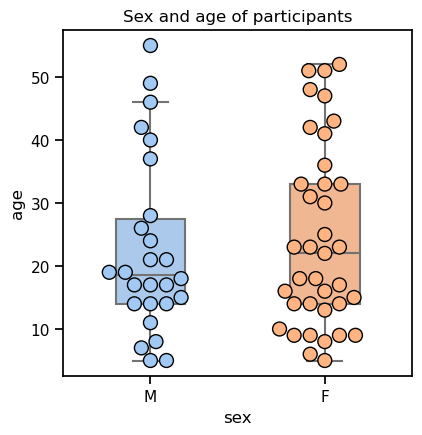

In [6]:
plt.figure(figsize=(4.5, 4.5))
sns.swarmplot(data=table_subjs, x='sex', y='age', size=10, edgecolor='black', linewidth=1, palette='pastel')
sns.boxplot(data=table_subjs, x='sex', y='age', width=.4, palette='pastel')
plt.title('Sex and age of participants')
plt.show()

* handedness

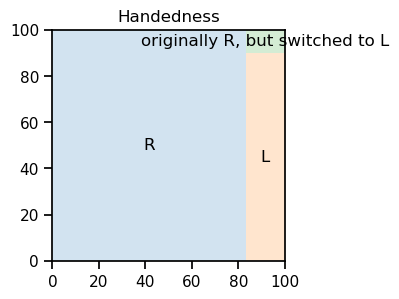

In [7]:
plot_value_counts(table_subjs['handedness'])
plt.title('Handedness')
plt.show()

* language dominance

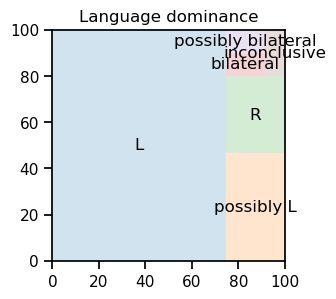

In [8]:
plot_value_counts(table_subjs['language_dominance'])
plt.title('Language dominance')
plt.show()

* distribution of fMRI / iEEG and high-density iEEG data across participants

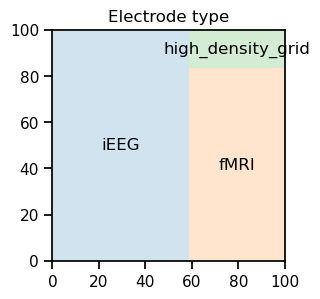

In [9]:
plot_sums(table_subjs[['iEEG', 'fMRI', 'high_density_grid']].eq('yes').mul(1))
plt.title('Electrode type')
plt.show()

* implanted iEEG hemisphere

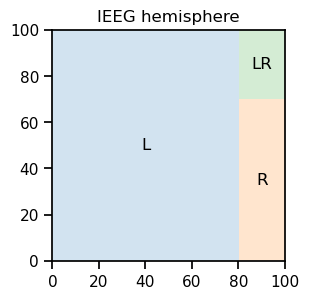

In [10]:
plot_value_counts(table_subjs['iEEG_hemisphere'])
plt.title('IEEG hemisphere')
plt.show()

* percent of bad iEEG channels across participants

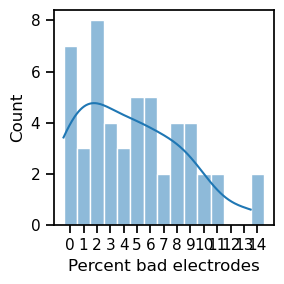

4 subjects with >10% bad electrodes


In [11]:
plot_bad_ratios(meta['bad%'])
plt.show()
print(str((meta['bad%'].round() > 10).sum()) + ' subjects with >10% bad electrodes')

* number of good iEEG channels across participants

Median number of electrodes: 79.0


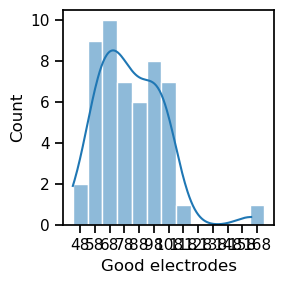

In [12]:
plot_good_electrodes(meta['good'])
print('Median number of electrodes: ' + str(meta['good'].median()))
plt.show()

* distribution of ECoG, sEEG and high-density ECoG across participants

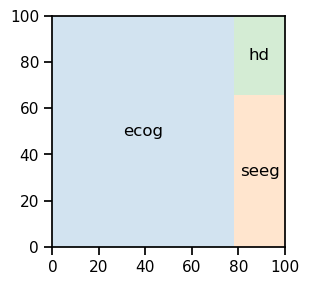

In [13]:
plot_sums(meta[['ecog', 'seeg', 'hd']])
plt.show()

* distribution of task rest and natural rest

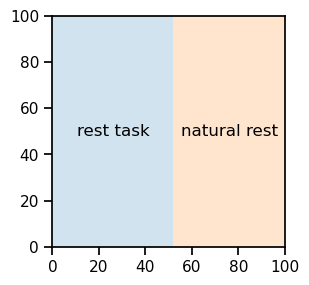

In [14]:
plot_value_counts(meta['rest'])
plt.show()

* sampling rate of iEEG data

/home/julia/Documents/Python/anaconda3/envs/mne/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


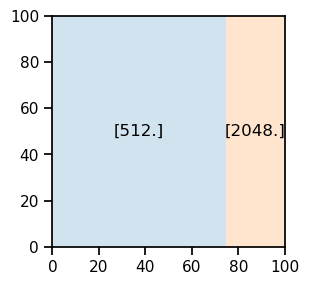

In [15]:
plot_value_counts(meta['sr'])
plt.show()

* anatomical sessions across participants (3t or 7t)

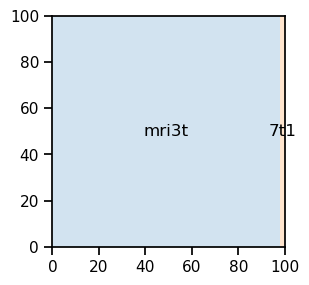

In [16]:
plot_value_counts(meta['anat'])
plt.show()

* distribution of breathing, heart rate and electroocculography data across participants

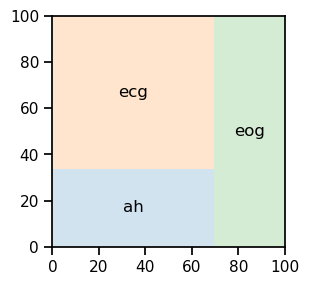

In [17]:
plot_sums(meta[['ah', 'ecg', 'eog']])
plt.show()